In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from collections import defaultdict

In [3]:
# you can get this file from https://github.com/pazqo/scalaWords, in data/zingarelli.txt
with open('./zingarelli.txt') as f:
    words = [x.strip() for x in f.readlines()]

In [4]:
char_position = defaultdict(list)

In [5]:
for word in words:
    l = len(word)
    for p, c in enumerate(word):
        # p/(l-1) is the position of the char in the word, as a number between 0 (first char) and 1 (last char)
        char_position[c].append(p/(l-1))

In [6]:
# for each char, the length of the list is the total number of occurrences
char_total_freq = {c: len(vs) for c, vs in char_position.items()}
# we also need the total number of chars (this is the same as sum([len(word) for word in words]))
total_chars = sum(list(char_total_freq.values()))

In [7]:
# the average number of chars per word is 10.47, hence 11 is a nice rounding; I guess 10 should work too.
char_freqs = dict()
for c, xs in char_position.items():
    vals, _ = np.histogram(xs, bins=11)
    char_freqs[c] = vals

In [8]:
# we need to normalize color scale with the most frequent char
top_char, top_freq = max(char_total_freq.items(), key=lambda x: x[1])

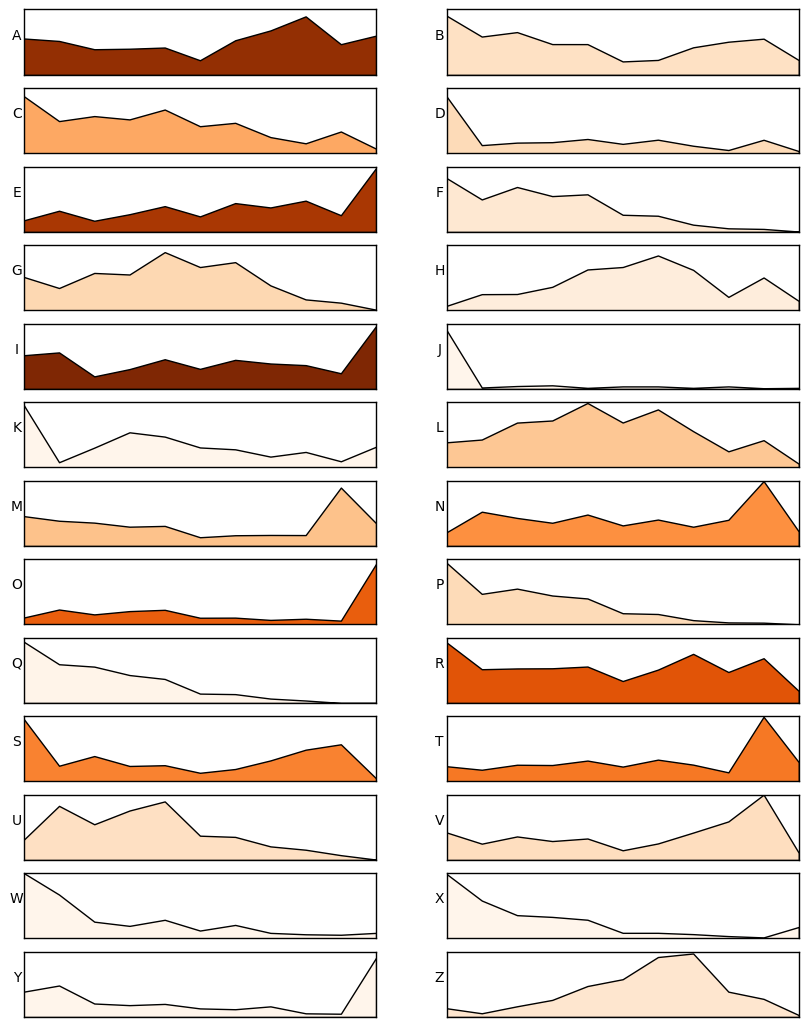

In [9]:
# most of the code is just to arrange the pictures.
# vs is the height of each bin, which are the points of each line
f, axarr = plt.subplots(13, 2, figsize=(10,13))
cmap = plt.get_cmap('Oranges')
for k, (c, vs) in enumerate(sorted(char_freqs.items())):
    line = axarr[k//2, k%2].fill_between(np.arange(0,11), vs, facecolor=cmap(char_total_freq[c]/top_freq))
    l = axarr[k//2, k%2].set_ylabel(c)
    l.set_rotation(0)
    axarr[k//2, k%2].set_xticks([])
    axarr[k//2, k%2].set_yticks([])

In [10]:
# f.savefig('CharDistribution.svg', format='svg')
# f.savefig('CharDistribution.jpg', format='jpg')